In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os

In [3]:
# changing the directory
os.chdir("../")
%pwd
 #read the data file
data=pd.read_csv('BIG_MART_DATA/train_v9rqX0R.csv')

In [4]:
#first 5 columns of data
data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
#data types
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
# Prints the number of rows and columns in the DataFrame
data.shape

(8523, 12)

In [7]:
#any missing values
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
#data missing value in percentage
data.isna().sum()/len(data) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

## Univariate Analysis

**Category variables**


In [11]:
# for  univariate analysis-category variables
def UVA_category(data, category):
    size = len(category)
    rows = (size // 3) + 1  # Adjust the number of rows based on the number of categories
    cols = min(size, 3)  # Limit the number of columns to 3 for better readability

    plt.figure(figsize=(10 * cols, 5 * rows), dpi=100)

    # For every variable
    for j, i in enumerate(category):

        if data[i].isnull().sum() > 0:
            print(f"Warning: Column '{i}' contains missing values. Consider handling them during preprocessing.")

        norm_count = data[i].value_counts(normalize=True)
        n_uni = data[i].nunique()

        # Plotting the variable with every information
        plt.subplot(rows, cols, j + 1)
        sns.barplot(x=norm_count.index, y=norm_count, order=norm_count.index)
        plt.xlabel(f'{i}', fontsize=20)
        plt.ylabel('fraction/percent', fontsize=20)
        plt.title(f'n_uniques = {n_uni} \n value counts \n {norm_count}')

    plt.tight_layout()
    plt.show()

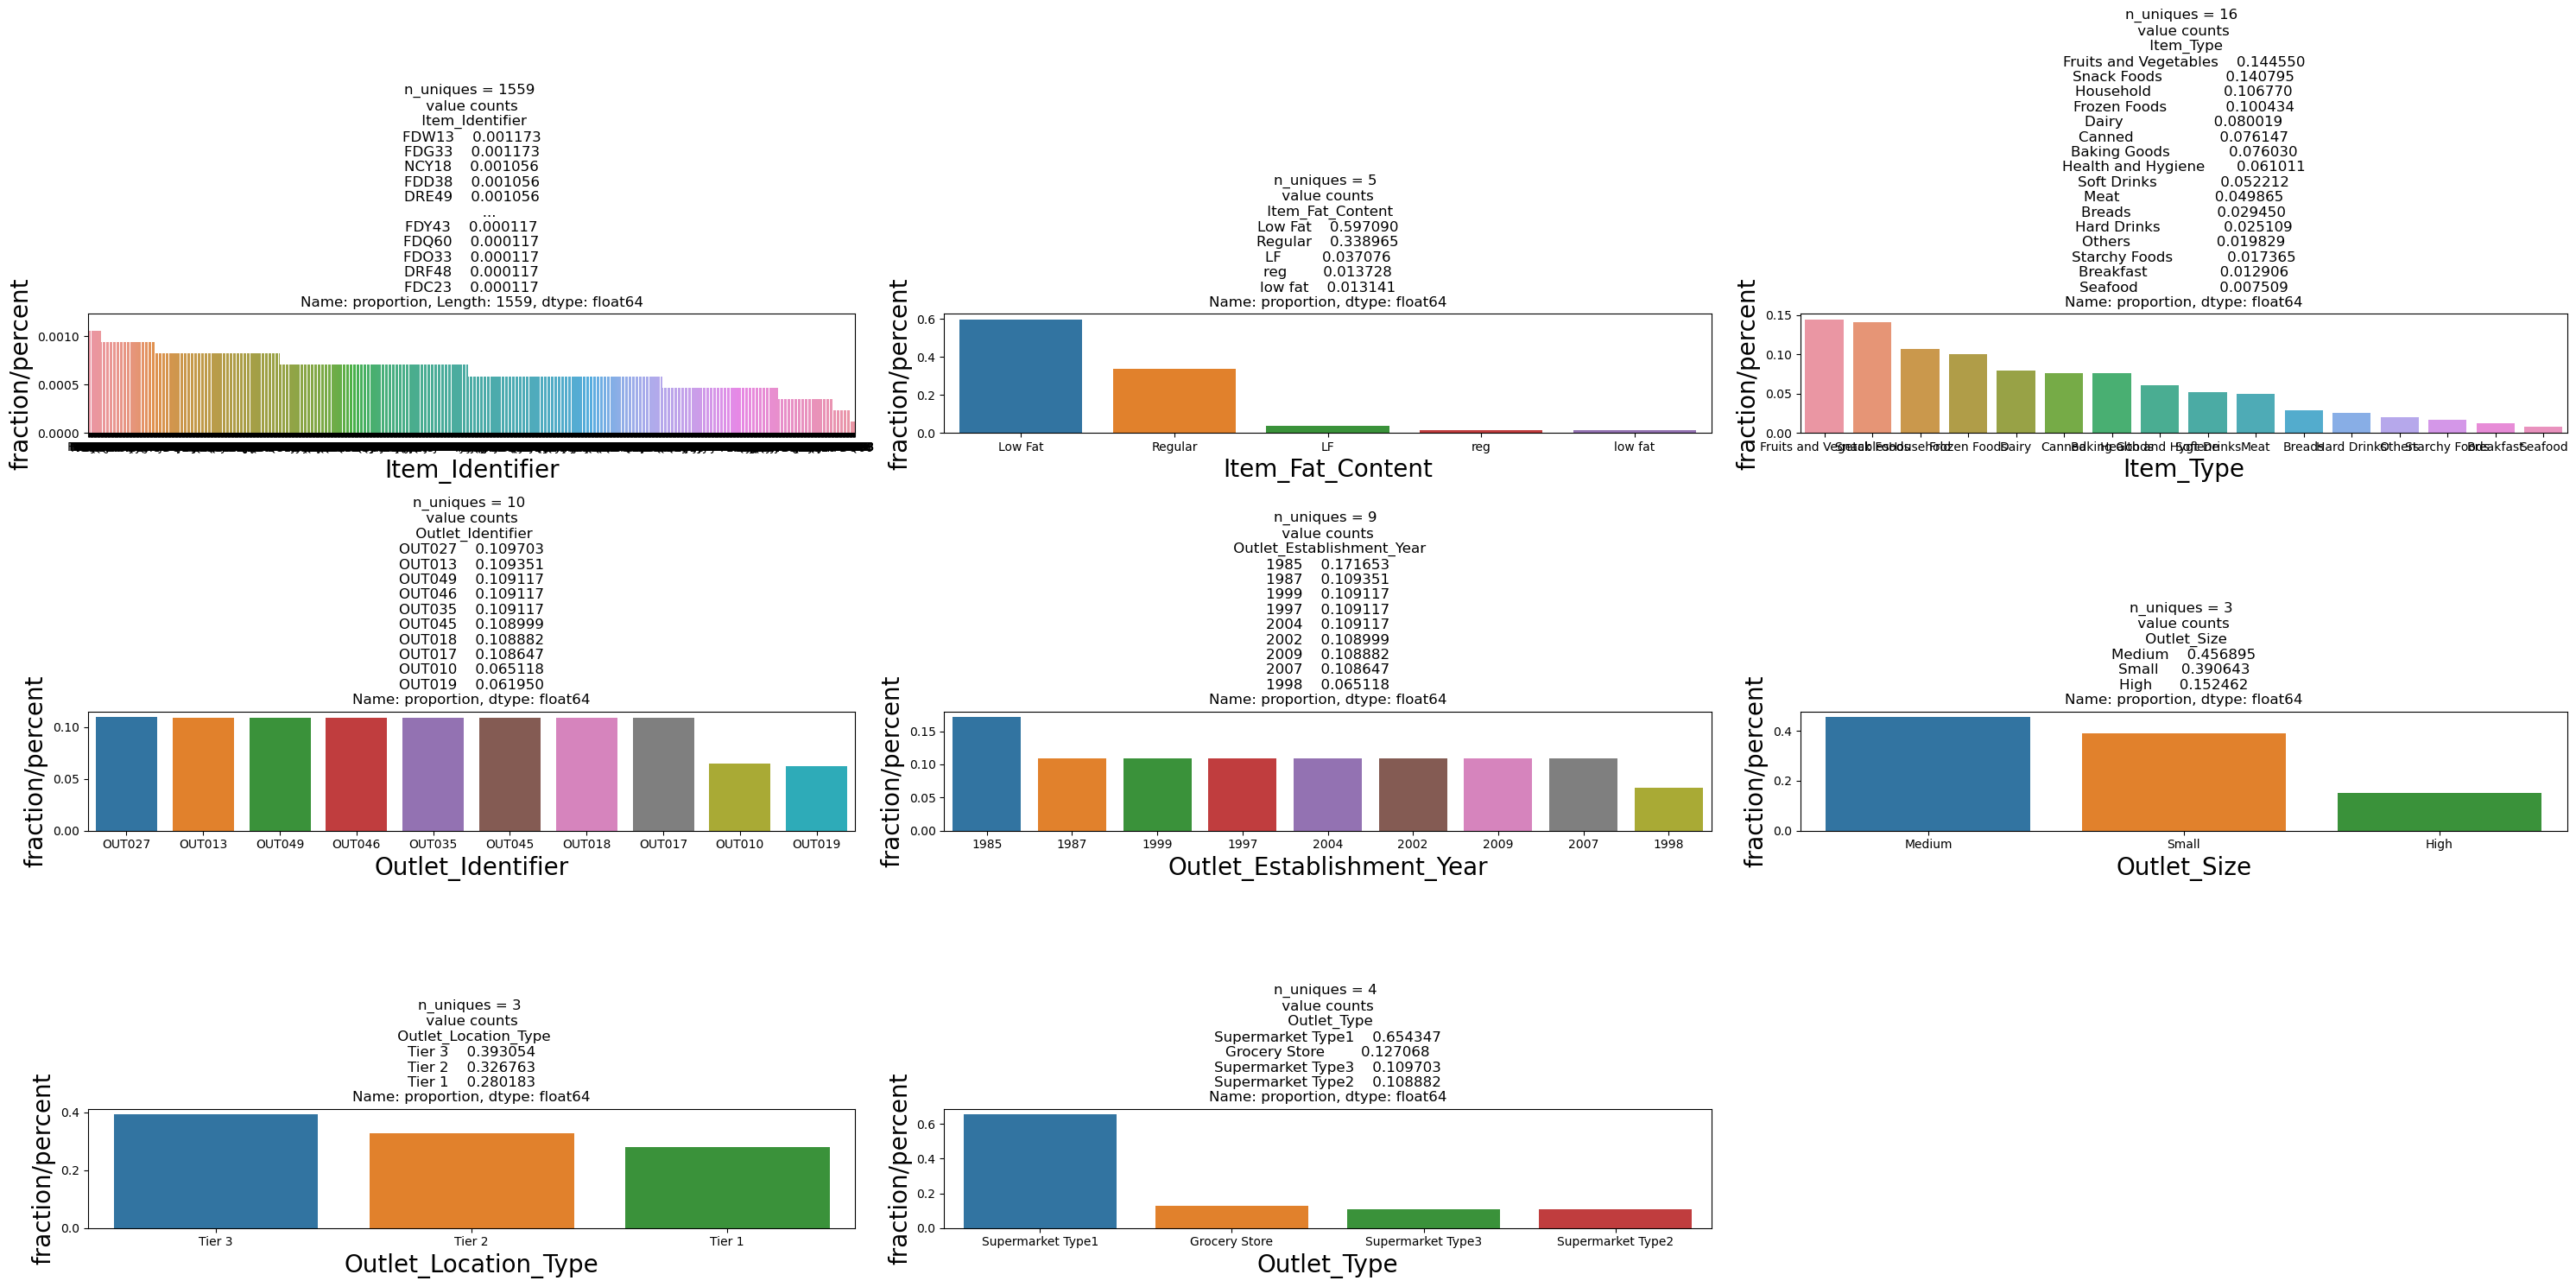

In [12]:
category=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']
UVA_category(data, category)

# SUMMARY : Category variables
## Item_Identifier :
- Item identifier consists of a **unique id** of **1559**

## Item_Fat_Content :
- Has 5 unique  products but if see **Low fat** and **Lf** and **low fat** products means same need and similar with **Regular** and **reg**
- so we have **2 unique** products **Low fat** and **Regular**
- **Low fat** products is **Higher**  with **~65%** compare to **Regular** products

## Item_Type :
- There are **16 types** of **item type**
- **Fruits and Vegetables** are the **highest** performed **item type** with **14.45%** and followed by **Snack Foods** with **14.08%**
- **Seafood** are **least** performed **item type** with **0.75%**

## Outlet_Identifier :
- Out of the **10 identified outlets**, **8 are performing similarly**, while **2 show noticeably lower sales performance**.
- **Top** performing **outlet_identifier: OUT027**
- **OUT010 and OUT19** outlet_identifier performing **low** compare to other outlet_identifier

## Outlet_Establishment_Year :
- The majority of outlets were **established between 1985 and 2009**, with the **highest concentration in 1985**
- The **least number of outlets** were established in **1998**

## Outlet_Size :
- There are **3** type of **Outlet Size** and It consists of **Missing Values** of **~28%**
- **Medium** type **outlet size** are **High performing** with **~46%** and followed by **small** type outlet size  with **~39%**
- **High** type **outlet size** are **Least performing** with **~15%**
  
## Outlet_Location_Type :
- There are **3** type of **Outlet Location Type** 
- **Tier 3**  **outlet Location type** are **High performing** with **~39%** and followed by **Tier 2** type outlet Location type with **~32.6%**
- **Tier 1** type **outlet Location type** are **Least performing** with **~28%**
 
## Outlet_Type :
- There are **4** type of **Outlet Type**
- **Super Market type 1**  **Outlet Type** are **High performing** with **~65.4%** and followed by **Grocery store and Super Market type 3** Outlet Type  with **~12.7% and ~10.9**
- **Super Market type 2** **Outlet Type** are **Least performing** with **~10.88%**

**Numerical Variables**

In [15]:
def UVA_numeric(data, numerical):
    size = len(numerical)
    rows = (size // 3) + 1  # Adjust the number of rows based on the number of categories
    cols = min(size, 3)  # Limit the number of columns to 3 for better readability

    plt.figure(figsize=(7 * cols, 4*rows), dpi=100)

    # Looping for each variable
    for j, i in enumerate(numerical):
        # Calculating descriptives of a variable
        if data[i].isnull().sum() > 0:
            print(f"Warning: Column '{i}' contains missing values. Consider handling them during preprocessing.")

        mini = round(data[i].min(), 2)
        maxi = round(data[i].max(), 2)
        ran = round(data[i].max() - data[i].min(), 2)
        mean = round(data[i].mean(), 2)
        median = round(data[i].median(), 2)
        st_dev = round(data[i].std(), 2)
        skew = round(data[i].skew(), 2)
        kurt = round(data[i].kurtosis(), 2)

        # Calculating points for range of data within one standard deviation from mean
        points = round(mean - st_dev, 2), round(mean + st_dev, 2)

        # Plotting the variable with all the information
        ax = plt.subplot(rows, cols, j + 1)
        sns.kdeplot(x=data[i], fill=True)
        sns.lineplot(x=points, y=[0, 0], color='black', label="within 1 std_dev")
        sns.scatterplot(x=[mini, maxi], y=[0, 0], color='orange', label=f"min&max={mini}&{maxi}")
        sns.scatterplot(x=[mean], y=[0], color='red', label=f"mean={mean}")
        sns.scatterplot(x=[median], y=[0], color='blue', label=f"median={median}")
        
        # Lift x-axis up slightly
        ax.spines['bottom'].set_position(('outward', 10))  # Move x-axis upwards by 10 points
        
        plt.xlabel(f'{i}', fontsize=20)
        plt.ylabel('density')
        plt.title(f'within 1 std_dev={points[0]} to {points[1]}; kurtosis={kurt};\n skew = {skew}; range = {ran}')

    plt.tight_layout()
    plt.show()

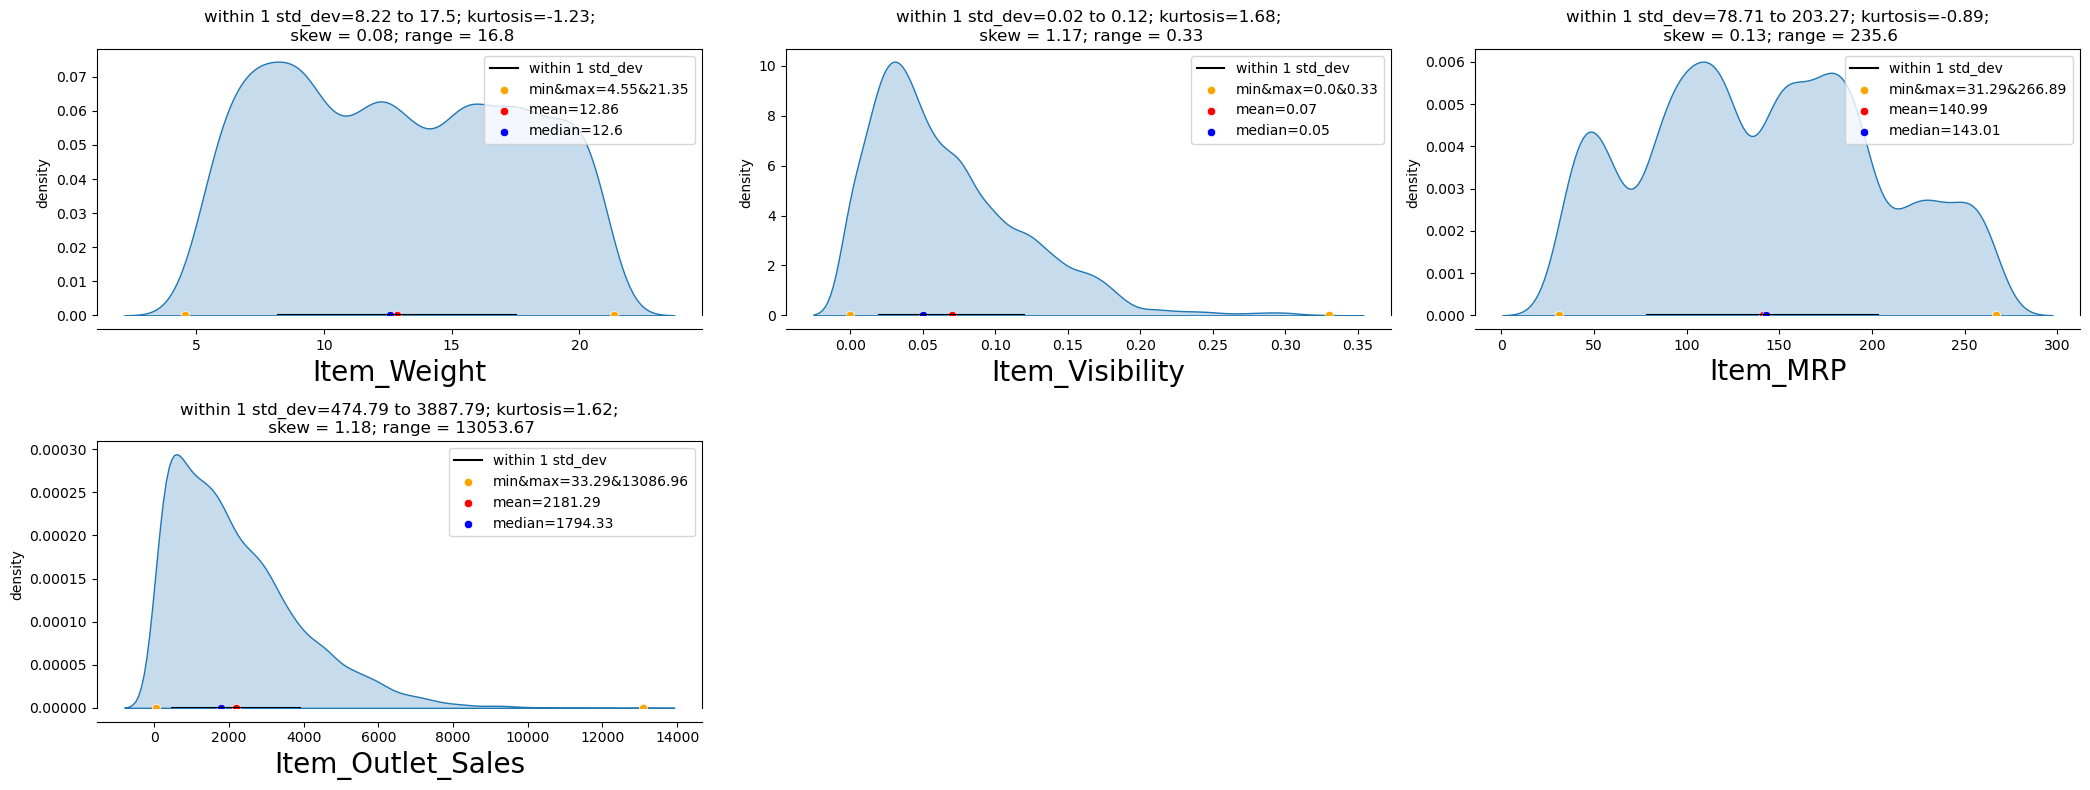

In [16]:
numerical=['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']
UVA_numeric(data, numerical)

**Outlier Detection**

In [18]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data=data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 1st,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data=data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 1st,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

True
True
True
True


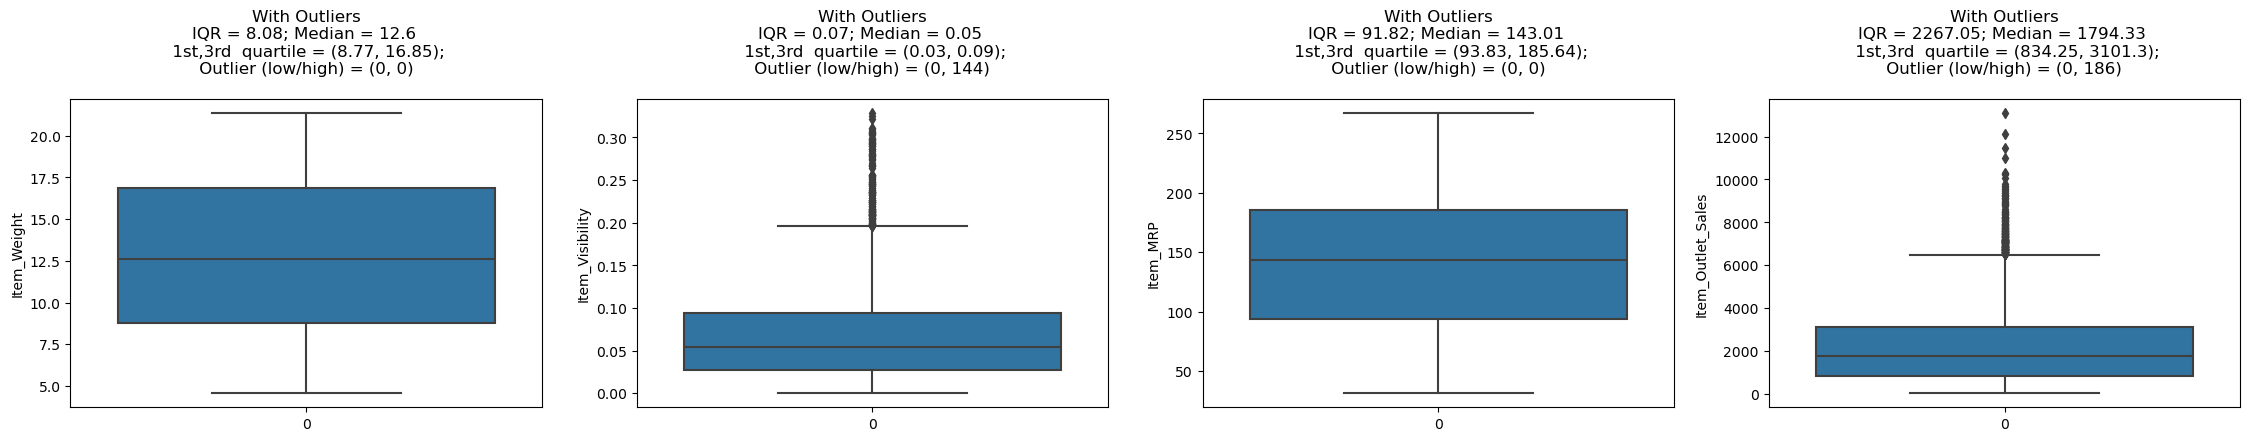

In [19]:
UVA_outlier(data, var_group=numerical, include_outlier = True)

## SUMMARY : Numerical Variables
## Item_Weight :
- The **Min** and **Max** Item Weight was **4.55 and 21.35**
- The **Mean and Median** of Item weight was **12.86 and 12.6**
- **Skew and Kurtosis**  of Item weight was **0.08(symmetrical) and -1.23(platykurtic)**
- **IQR** is **8.08**
- **1st and 3rd** Quartile are **8.77 and 16.85**
- **No Outliers**

## Item_Visibility :
- The **Min** and **Max** Item Visibility was **0.00 and 0.33**
- The **Mean and Median** of Item Visibility was **0.07 and 0.05**
- **Skew and Kurtosis**  of Item Visibility was **1.17(positively skewed) and 1.68(leptokurtic)**
- **IQR** is **0.07**
- **1st and 3rd** Quartile are **0.03 and 0.09**
- **Higher Outliers are present**

## Item_MRP :
- The **Min** and **Max** Item Mrp was **31.29 and 66.89**
- The **Mean and Median** of Item Mrp was **140.99 and 143.01**
- **Skew and Kurtosis**  of Item Mrp was **0.13(slightly positively skewed) and -0.89(platykurtic)**
- **IQR** is **91.82**
- **1st and 3rd** Quartile are **93.83 and 185.64**
- **No Outliers**

## Item_Outlet_Sales :
- The **Min** and **Max** Item Outlet Sales was **33.29 and 13086.96**
- The **Mean and Median** of Item Outlet Sales was **2181.29 and 1794.33**
- **Skew and Kurtosis**  of Item Outlet Sales was **1.18(positively skewedl) and 1.62(leptokurtic)**
- **IQR** is **2267.05**
- **1st and 3rd** Quartile are **834.25 and 3101.3**
- **Higher Outliers are present**


## Bivariate Analysis

**Numerical-Numerical Variables**


In [23]:
# isolating numerical datatypes
numerical = data.select_dtypes(include=['int64','float64','Int64'])[:]
# calculating correlation
correlation = numerical.dropna().corr()
correlation

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.006061,-0.016935,-0.085334
Item_MRP,0.027141,-0.006061,1.000000,-0.001657,0.620961
Outlet_Establishment_Year,-0.011588,-0.016935,-0.001657,1.000000,0.012212
Item_Outlet_Sales,0.014123,-0.085334,0.620961,0.012212,1.000000


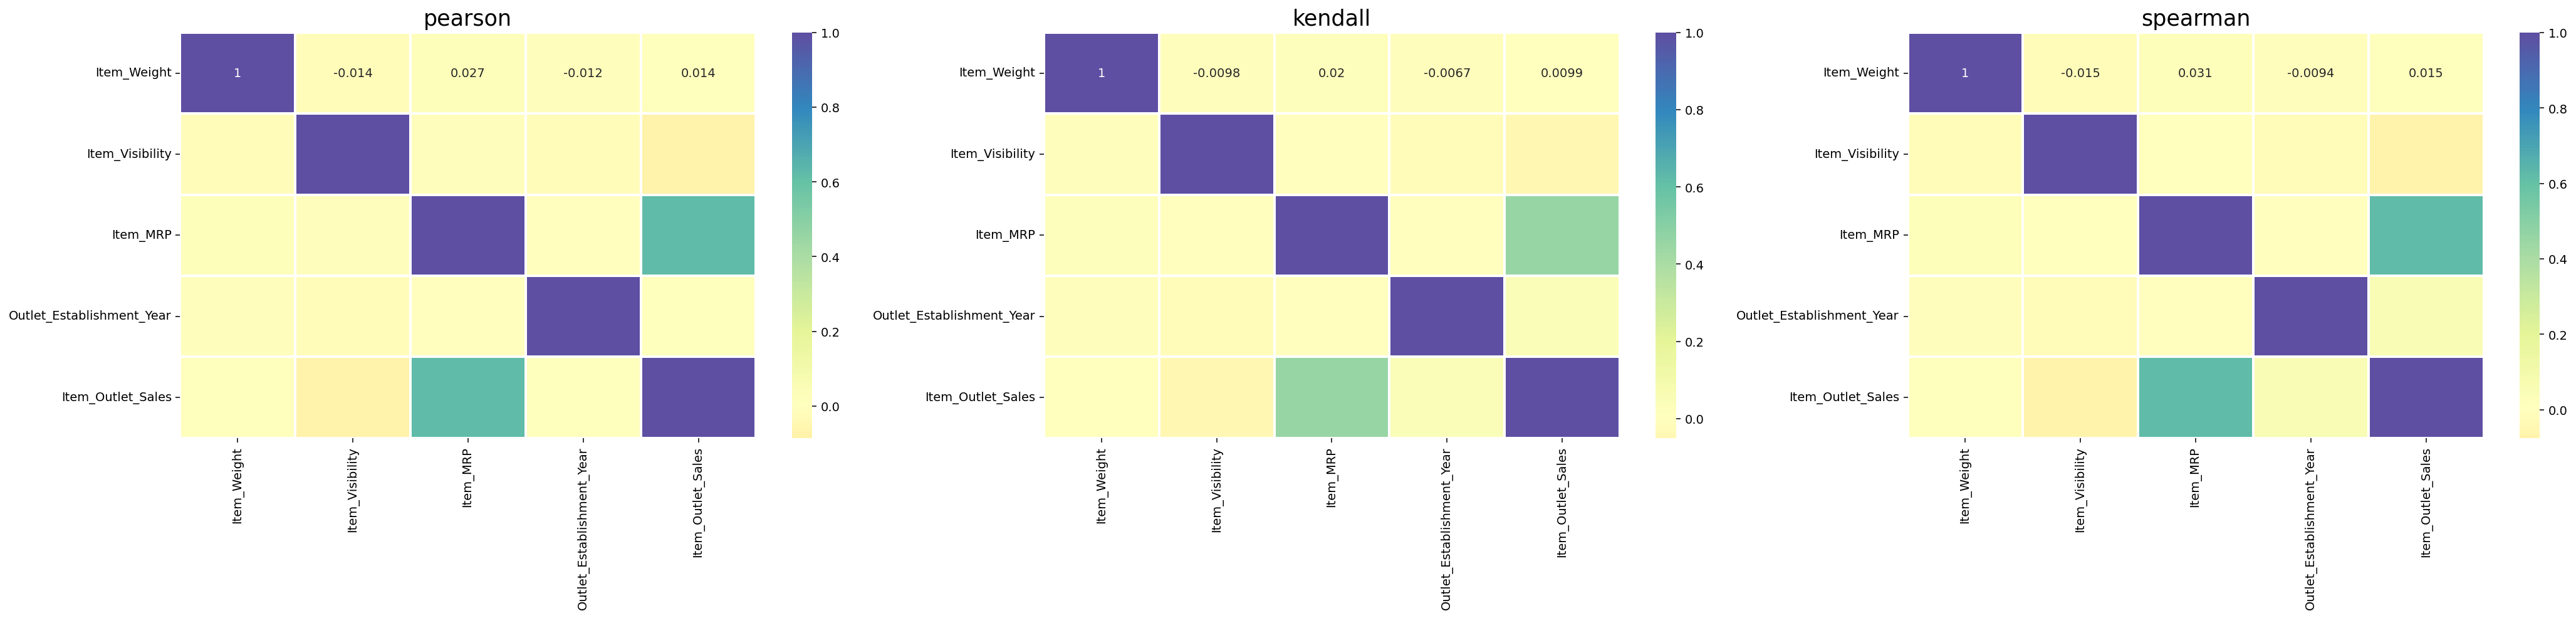

In [24]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidths=2, cmap='Spectral', center=0,annot=True)
  plt.title(i, fontsize=18)

## SUMMARY : NUMERICAL_NUMERICAL
## Item_Weight and Other Variables:
- The **correlation** between **Item_Weight** and the **other variables** is **very weak**, with values close to **zero**.
- **Item_Weigh**t has a **very weak positive correlation** with **Item_MRP** (0.027).
- There is a **very weak positive correlation** with **Item_Outlet_Sales** (0.014) and a **slight negative correlation** with **Item_Visibility** (-0.014).
- It is **practically uncorrelated** with **Outlet_Establishment_Year** (-0.011).
  
## Item_Visibility and Other Variables:
- **Item_Visibility** shows a **very weak negative correlation** with **Item_Outlet_Sales** (-0.085) and is almost **uncorrelated** with the **other variables (Item_Weight, Item_MRP, and Outlet_Establishment_Year)**.
- The **negative correlation** with **Item_Outlet_Sales** suggests that **higher visibility** might **correlate** with **slightly lower sales**, but the **relationship** is **weak**.

## Item_MRP and Other Variables:
- **Item_MRP** has a **stronger positive correlation** with **Item_Outlet_Sales** (0.621), indicating that **higher MRP values tend to be associated with higher sales**.
- The **correlation** with **Item_Weight** (0.027) and **Item_Visibility** (-0.006) is **very weak**, suggesting that **these factors do not significantly influence MRP**.
- The **correlation** with **Outlet_Establishment_Year** is almost **negligible** (-0.0016).
  
## Outlet_Establishment_Year and Other Variables:

- **Outlet_Establishment_Year** is **weakly correlated** with **Item_Weight, Item_Visibility, and Item_Outlet_Sales**, with **values close to zero**.
- There is almost **no correlation** with **Item_MRP**.

## Item_Outlet_Sales:
- **Item_Outlet_Sales** shows a **moderately strong positive correlation** with **Item_MRP** (0.621).
- It shows a **very weak negative correlation** with **Item_Visibility** (-0.085), and a **very weak positive correlation** with **Item_Weight** (0.014).
- There is almost **no relationship** with **Outlet_Establishment_Year** (0.012).

**Numerical-Catergory Variables**

In [27]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
    '''
    takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
    '''
    from numpy import sqrt, abs, round
    from scipy.stats import norm
    
    ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
    z = (X1 - X2)/ovr_sigma
    pval = 2*(1 - norm.cdf(abs(z)))
    return pval
    
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
    '''
    takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
    '''
    from numpy import sqrt, abs, round
    from scipy.stats import t as t_dist
    
    ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
    t = (X1 - X2)/ovr_sd
    df = n1+n2-2
    pval = 2*(1 - t_dist.cdf(abs(t),df))
    return pval

In [28]:
def Bivariate_cont_cat(data, cont, cat, category):
    #creating 2 samples
    x1 = data[cont][data[cat]==category]
    x2 = data[cont][~(data[cat]==category)]

    #calculating descriptives
    n1, n2 = x1.shape[0], x2.shape[0]
    m1, m2 = x1.mean(), x2.mean()
    std1, std2 = x1.std(), x2.std()

    #calculating p-values
    t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
    z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

    #table
    table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

    #plotting
    plt.figure(figsize = (15,6), dpi=140)

    #barplot
    plt.subplot(1,2,1)
    # sns.barplot(x=[str(category),'not {}'.format(category)], y=[m1, m2])
    sns.barplot(x=cat, y=cont, data=data, ci=None)
    plt.ylabel(f'mean {cont}')
    plt.xlabel(cat)
    plt.title(f't-test p-value = {t_p_val} \n z-test p-value = {z_p_val}\n {table}')

    # boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=cat, y=cont, data=data)
    plt.title('categorical boxplot')


In [29]:
# Standardize 'Item_Fat_Content' values
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'Low fat': 'Low Fat',
    'reg': 'Regular',
    'Regular': 'Regular'
})

# Check the unique values to verify the changes
print(data['Item_Fat_Content'].unique())


['Low Fat' 'Regular']


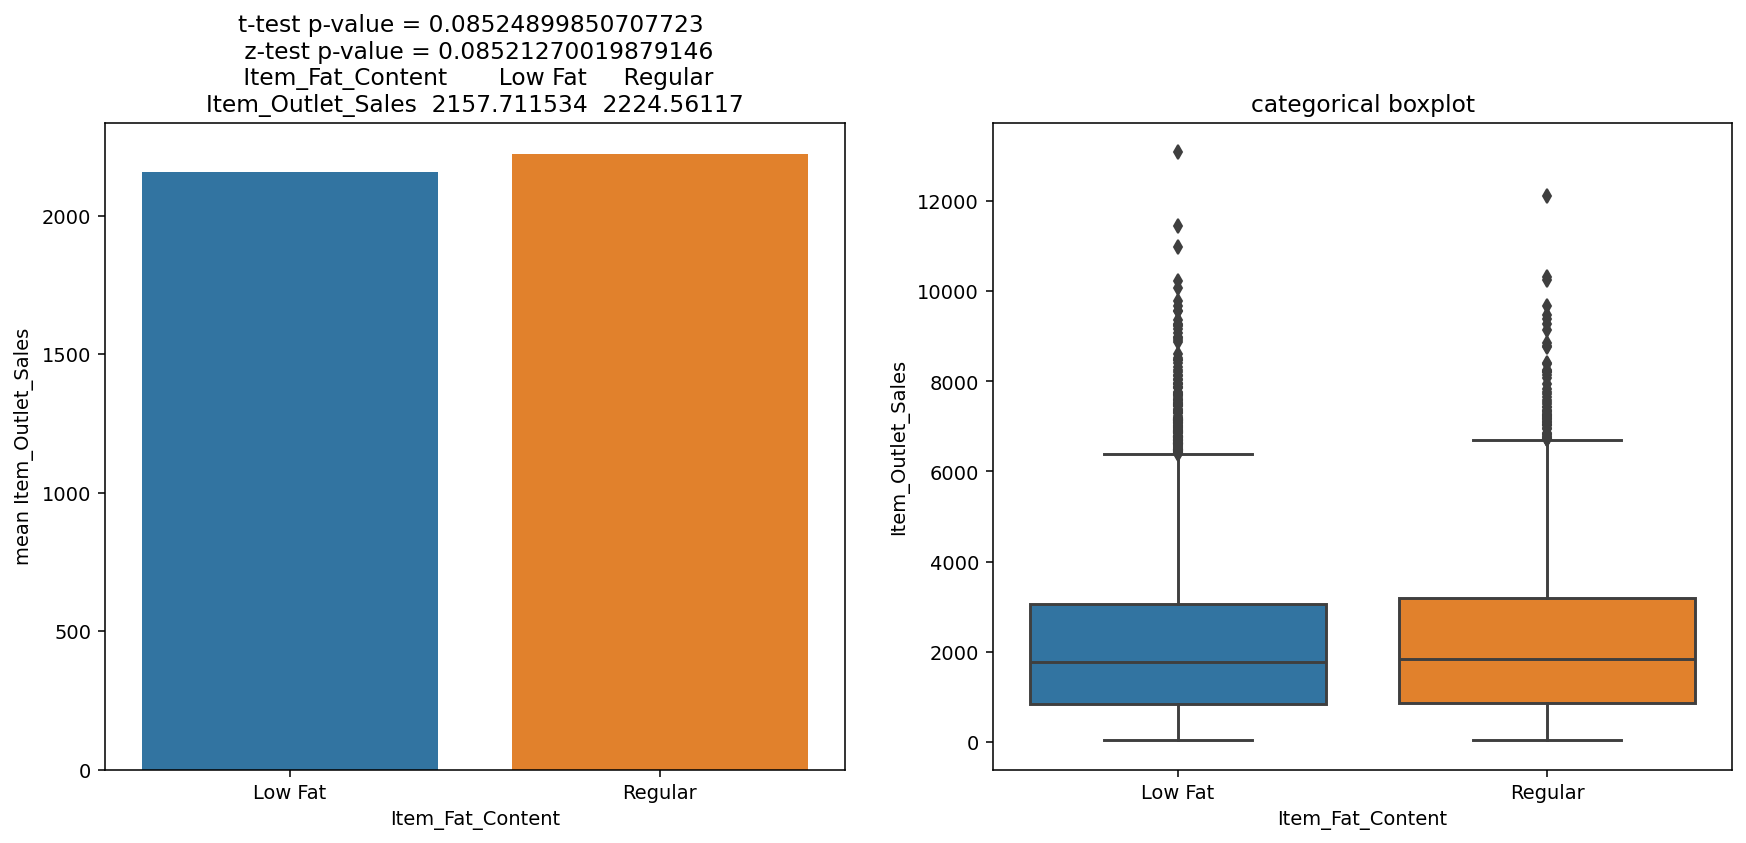

In [30]:
Bivariate_cont_cat(data,'Item_Outlet_Sales', 'Item_Fat_Content', category='Regular')

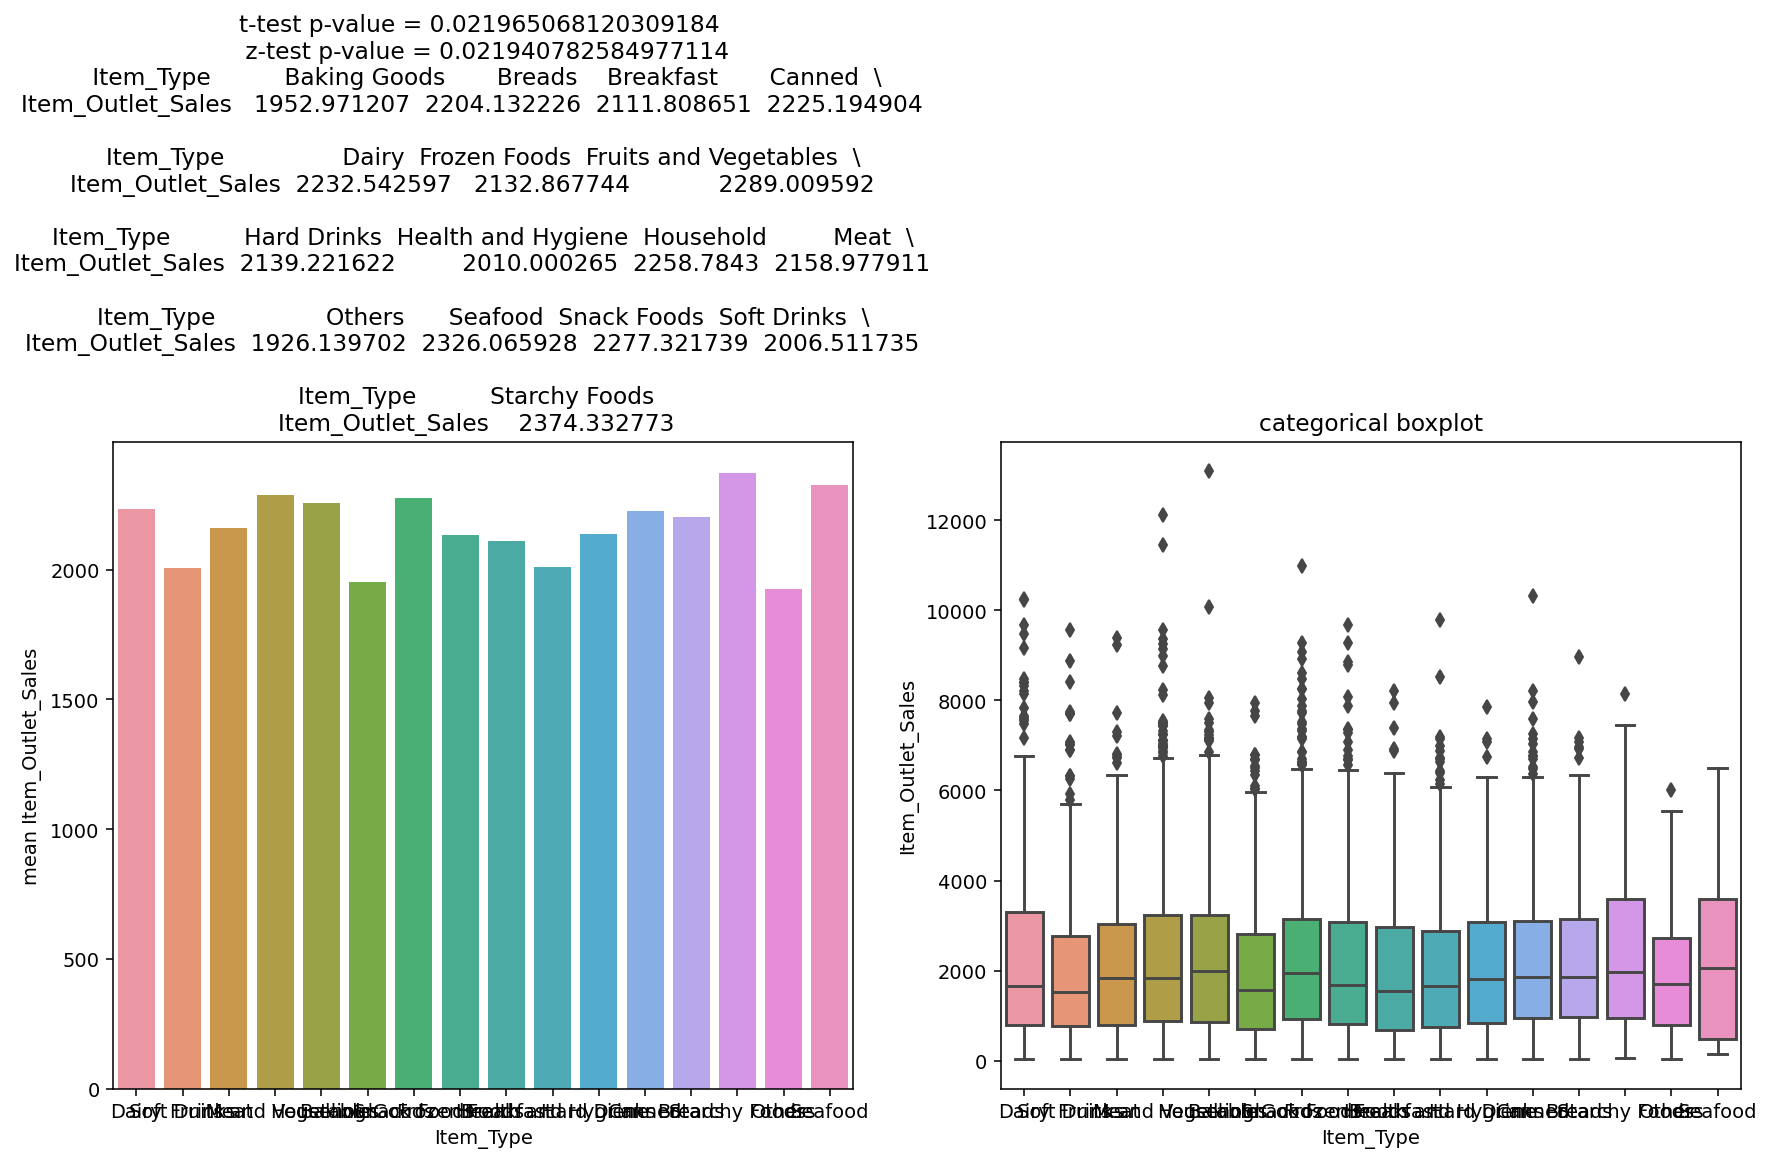

In [31]:
Bivariate_cont_cat(data,'Item_Outlet_Sales', 'Item_Type', category='Fruits and Vegetables')

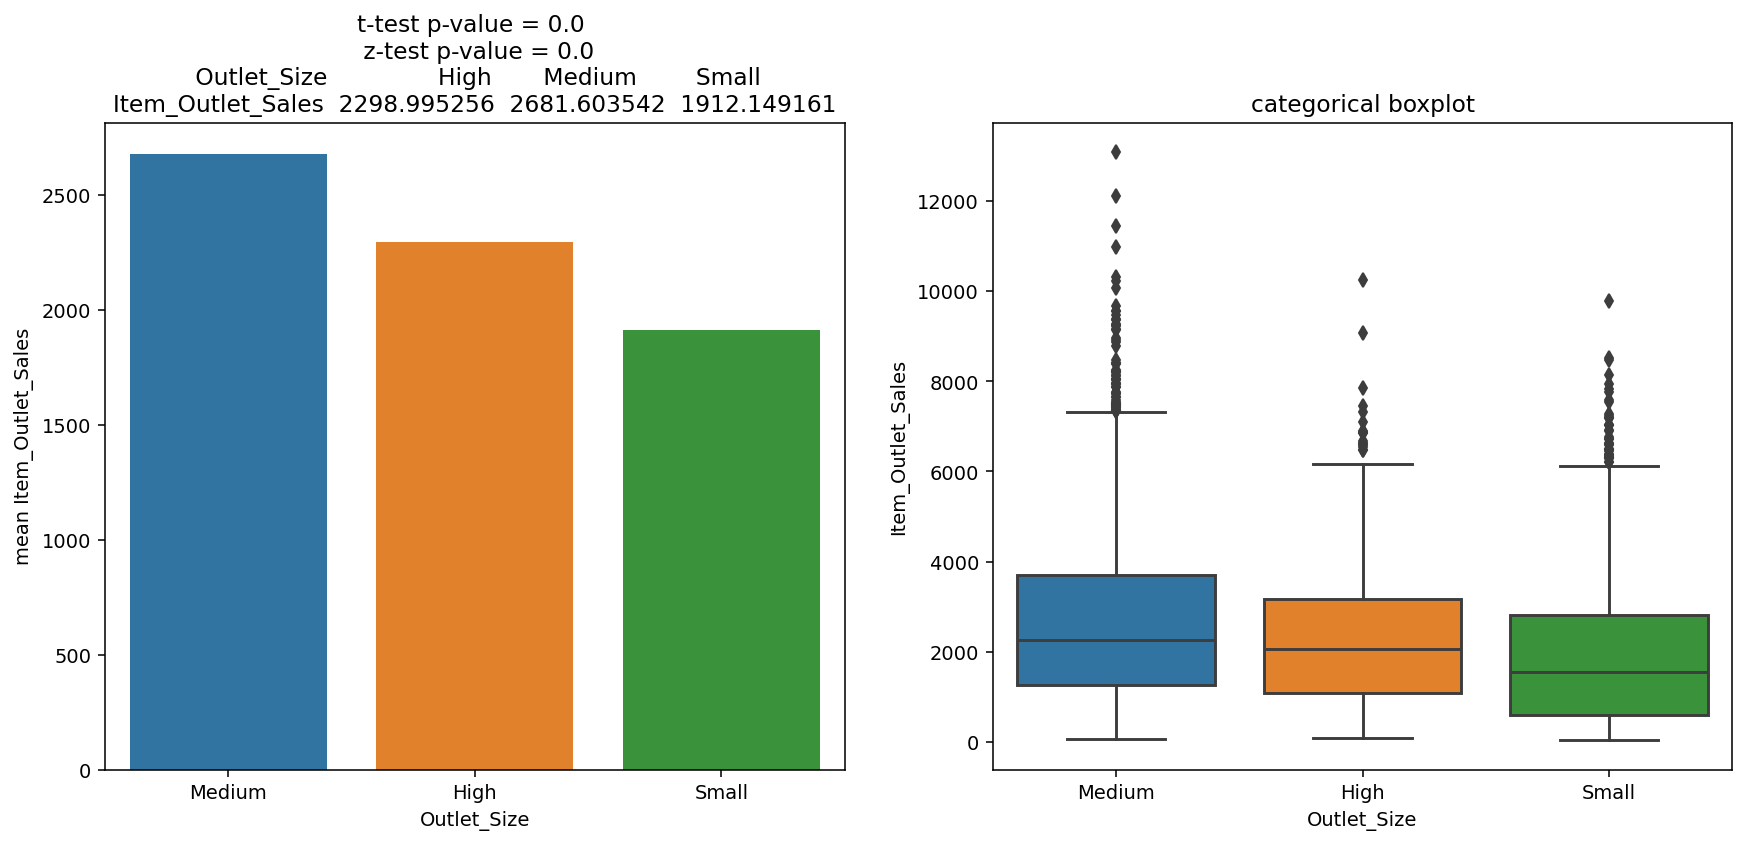

In [32]:
Bivariate_cont_cat(data,'Item_Outlet_Sales', 'Outlet_Size', category='Medium')

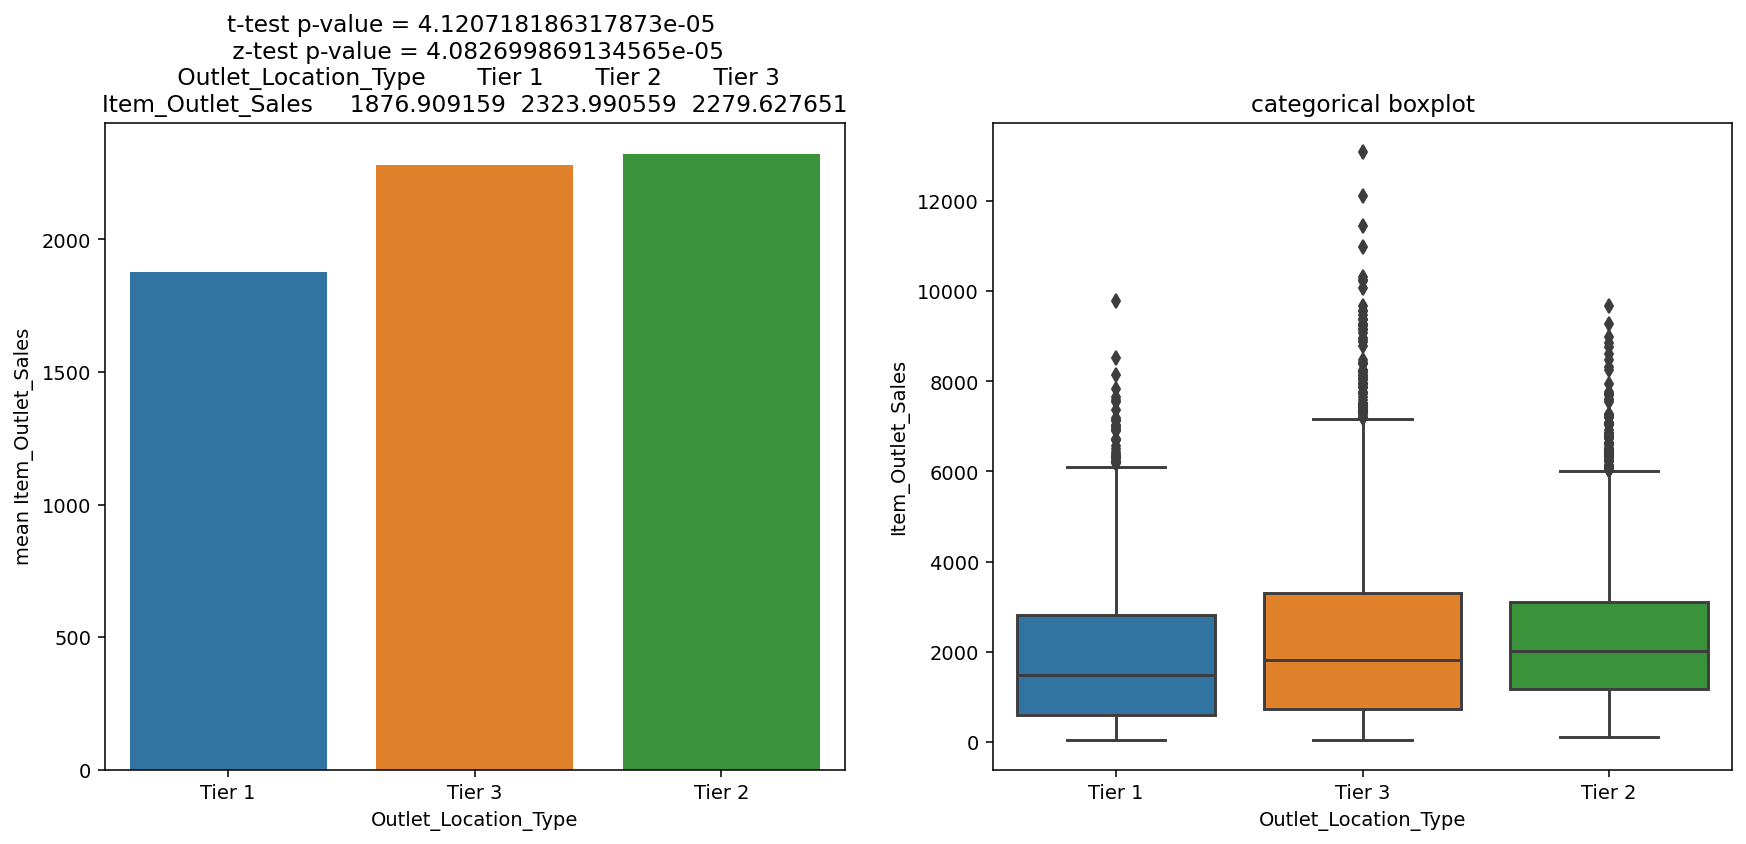

In [33]:
Bivariate_cont_cat(data,'Item_Outlet_Sales', 'Outlet_Location_Type', category='Tier 3')

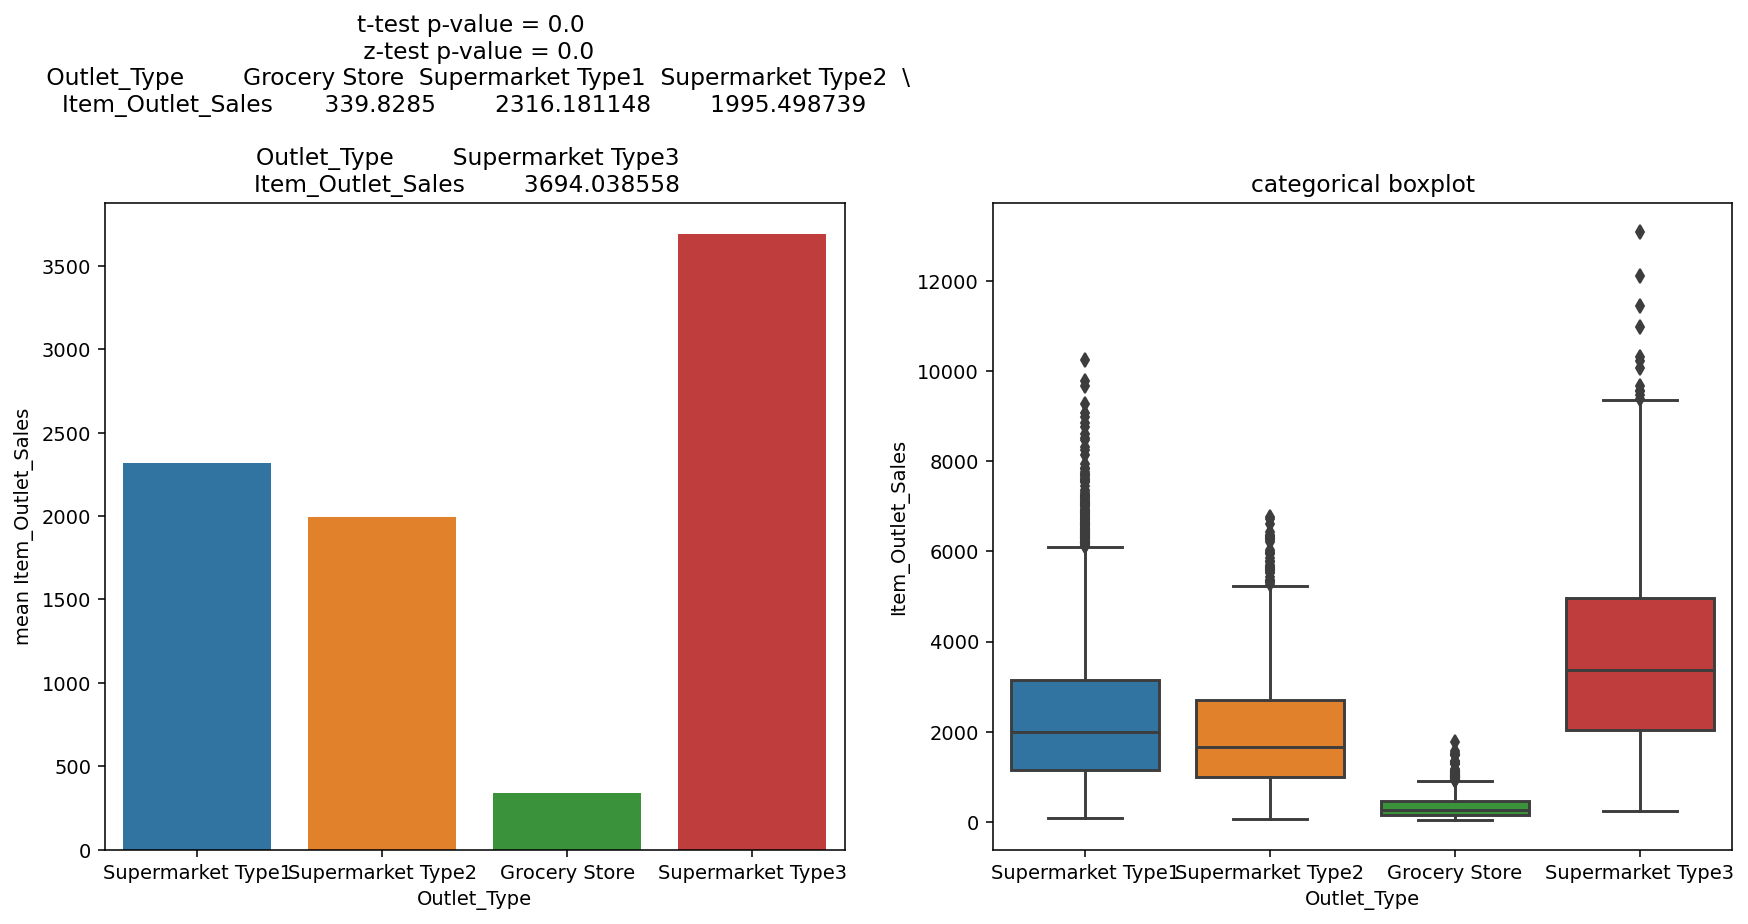

In [34]:
Bivariate_cont_cat(data,'Item_Outlet_Sales', 'Outlet_Type', category='Supermarket Type1')

## SUMMARY: Numerical-Catergory variable
**Item_Outlet_Sales and Item_Fat_Content** :
- The **t-test p-value of 0.08** indicates that the difference in sales between **'Low Fat' (2157.77) and 'Regular' (2224.56)** items is **not significantly different** at the 0.05 level. Therefore, **we reject the null hypothesis**, suggesting **not significantly different in sales between the two categories**.

**Item_Outlet_Sales and Item_Type** :
- The **t-test p-value of 0.02196** indicates a statistically significant difference in Item_Outlet_Sales between the 'Fruits and Vegetables' category (2289.01) and the other item categories at the 0.05 significance level. The sales of each category are:
- Fruits and Vegetables: 2289.01
- Snack Foods: 2326
- Household: 2258
- Frozen Foods: 2132
- Dairy: 2232
- Canned: 2225
- Baking Goods: 1952
- Health and Hygiene: 2010
- Soft Drinks: 2006
- Meat: 2158
- Breads: 2204
- Hard Drinks: 2139
- Others: 1926
- Starchy Foods: 2374
- Breakfast: 2111
- Seafood: 2326
- Since the p-value is less than 0.05, we **can't reject** the **null hypothesis** and conclude that the **sales of 'Fruits and Vegetables' not significantly differ from the other categories**.

**Item_Outlet_Sales and Outlet_Size** :
- The **t-test p-value** of **0.0** indicates a **There is no proper evidence**. We **can't reject the null hypothesis**, concluding that **'Medium'** outlets have **significantly different** sales from **'High' and 'Small'** outlets.

**Item_Outlet_Sales and Outlet_Location_Type** :
- we **can't reject Null Hypothesis**  indicates a **There is no  proper evidence to reject the Hypothesis**


**Item_Outlet_Sales and Outlet_Type** :
- we **can't reject Null Hypothesis** indicates a **There is no  proper evidence to reject the Hypothesis**


In [36]:
def BVA_categorical_plot(data, tar, cat):
    '''
    take data and two categorical variables,
    calculates the chi2 significance between the two variables 
    and prints the result with countplot & CrossTab
    '''
    #isolating the variables
    data = data[[cat,tar]][:]

    #forming a crosstab
    table = pd.crosstab(data[tar],data[cat])

    #performing chi2 test
    from scipy.stats import chi2_contingency
    chi, p, dof, expected = chi2_contingency(table)

    #checking whether results are significant
    if p<0.05:
        sig = True
    else:
        sig = False

    #plotting grouped plot
    sns.countplot(x=cat, hue=tar, data=data)
    plt.title(f"p-value = {round(p, 8)}\n difference significant? = {sig}\n")

    #plotting percent stacked bar plot
    ax1 = pd.crosstab(data[cat], data[tar], normalize='index')
    # ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack() old code
    ax1.plot(kind='bar', stacked='True',title=str(ax1))
    # int_level = data[cat].value_counts() old code

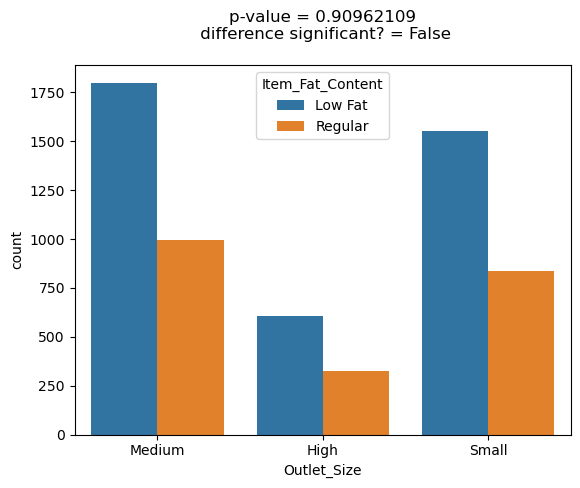

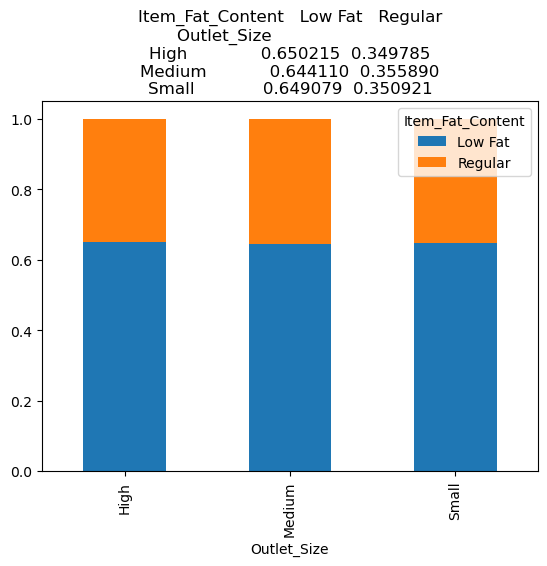

In [37]:
BVA_categorical_plot(data, 'Item_Fat_Content', 'Outlet_Size')

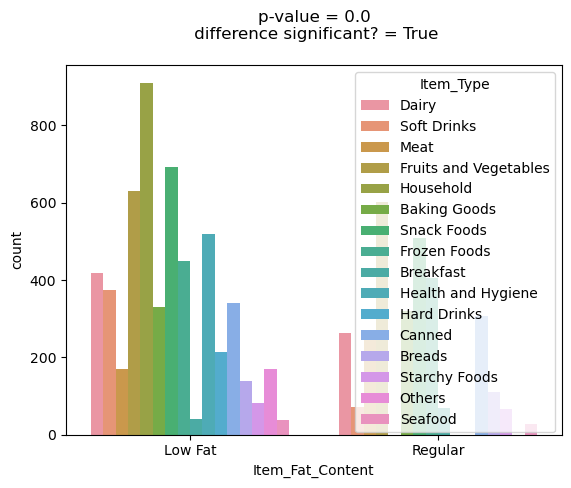

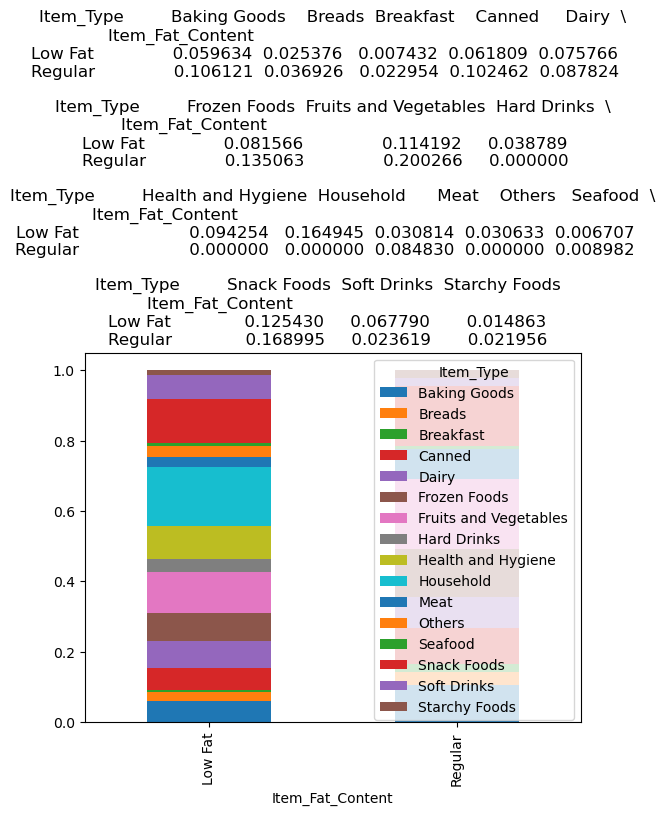

In [38]:
BVA_categorical_plot(data, 'Item_Type', 'Item_Fat_Content')

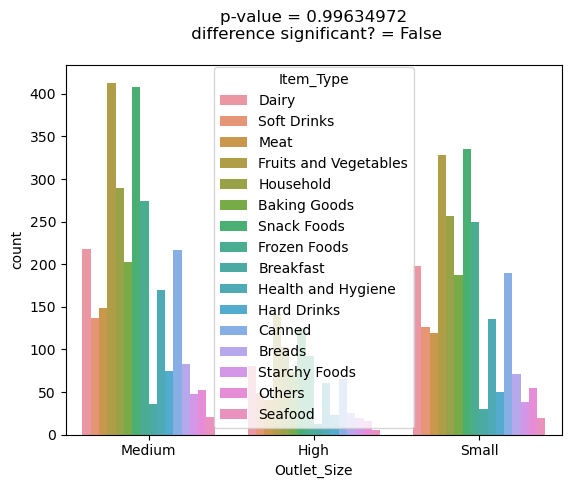

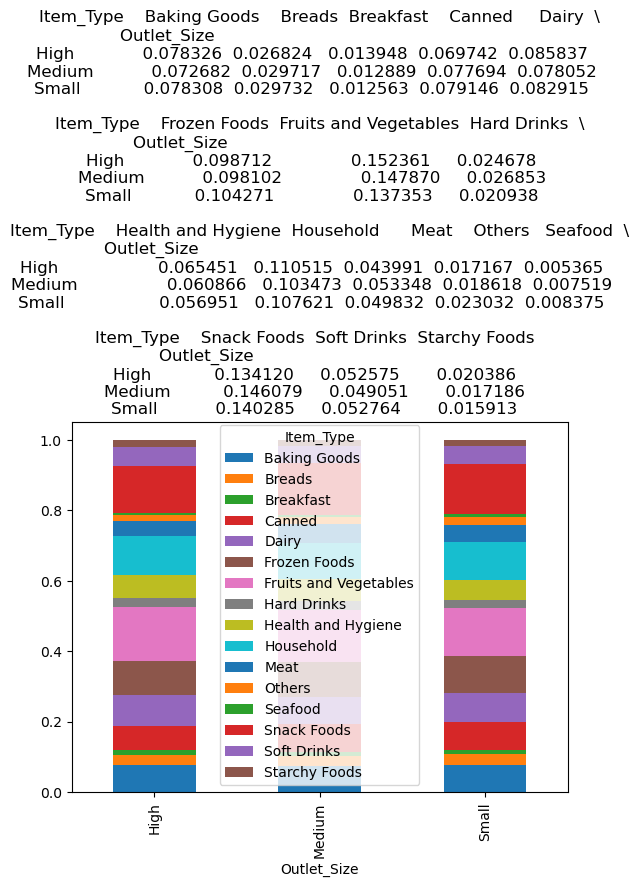

In [39]:
BVA_categorical_plot(data, 'Item_Type', 'Outlet_Size')

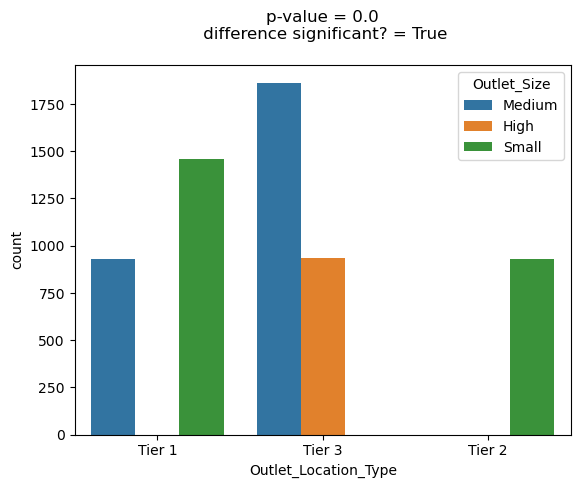

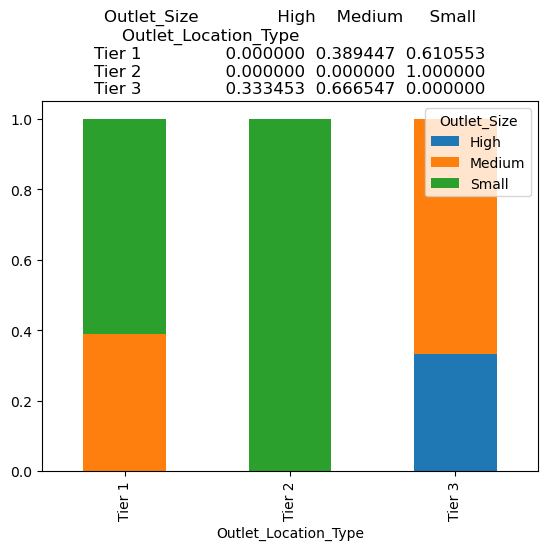

In [40]:
BVA_categorical_plot(data, 'Outlet_Size', 'Outlet_Location_Type')

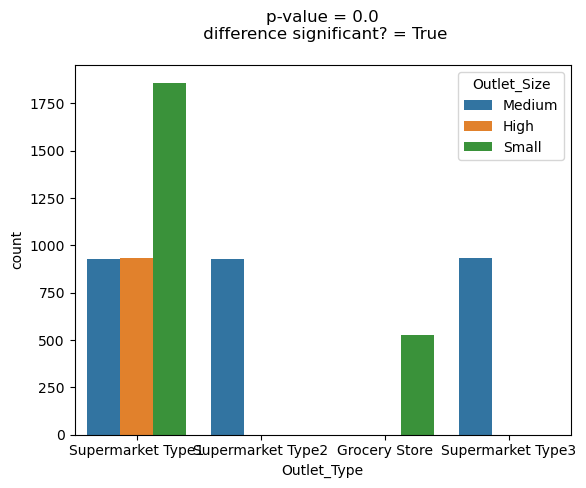

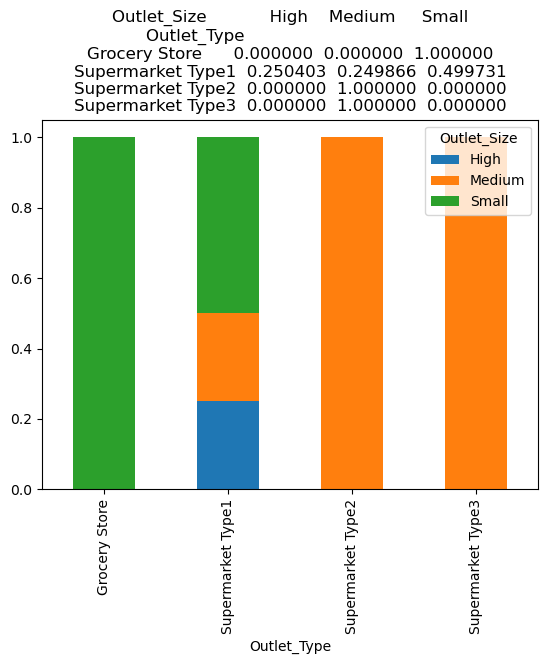

In [41]:
BVA_categorical_plot(data, 'Outlet_Size', 'Outlet_Type')

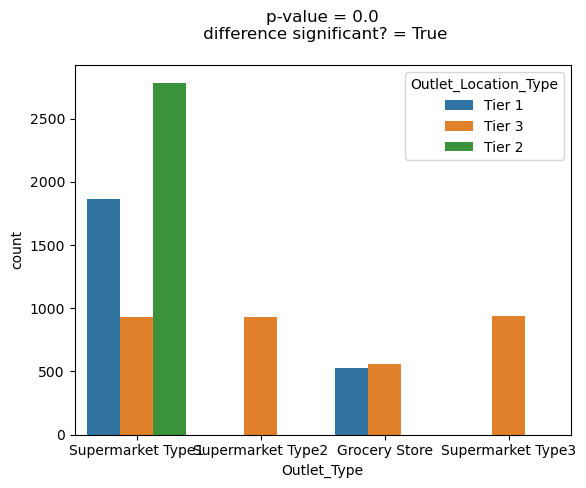

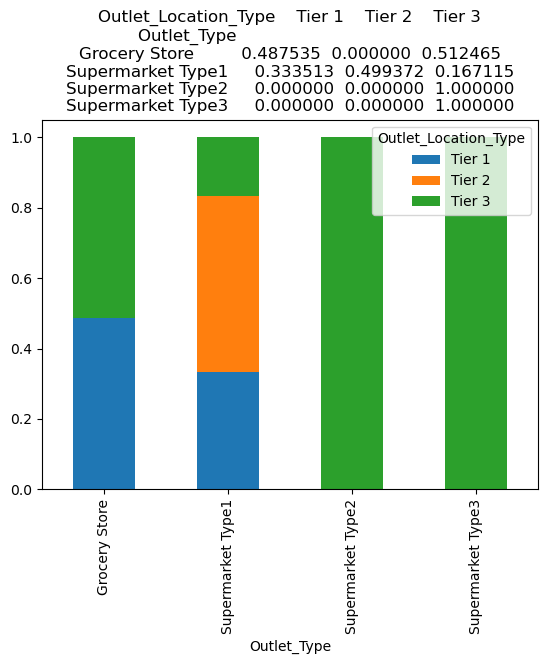

In [42]:
BVA_categorical_plot(data, 'Outlet_Location_Type', 'Outlet_Type')